In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandahouse as ph
sns.set(
    font_scale=1,
    style='whitegrid',
    rc={'figure.figsize':(12,8)}
        )
connection_default = {'host': 'http://clickhouse.beslan.pro:8080',
                      'database':'default',
                      'user':'student', 
                      'password':'dpo_python_2020'
                     }

In [3]:
query = '''
SELECT 
    count(*)
FROM
    ldn_listings
'''

int(ph.execute(query, connection_default))

85207

In [4]:
query = '''
SELECT
    room_type,
    toFloat32OrNull(replaceRegexpAll(price, '[,$]', '')) as price
FROM
    ldn_listings
ORDER BY id
LIMIT 1000
'''

df = ph.read_clickhouse(query, connection = connection_default)

In [5]:
df.groupby(['room_type'])['price'].quantile(0.75)

room_type
Entire home/apt    160.00
Hotel room         157.00
Private room        70.00
Shared room         69.25
Name: price, dtype: float64

In [6]:
query = '''
SELECT
    room_type,
    toFloat32OrNull(review_scores_rating) as review_scores_rating,
    toFloat32OrNull(replaceRegexpAll(price, '[,$]', '')) as price
FROM
    ldn_listings
WHERE review_scores_rating is not null
ORDER BY id
LIMIT 1000'''
df = ph.read_clickhouse(query, connection=connection_default)

In [9]:
df = df.groupby(['room_type'], as_index=False) \
    .agg({'review_scores_rating': 'mean',
         'price': 'mean'})

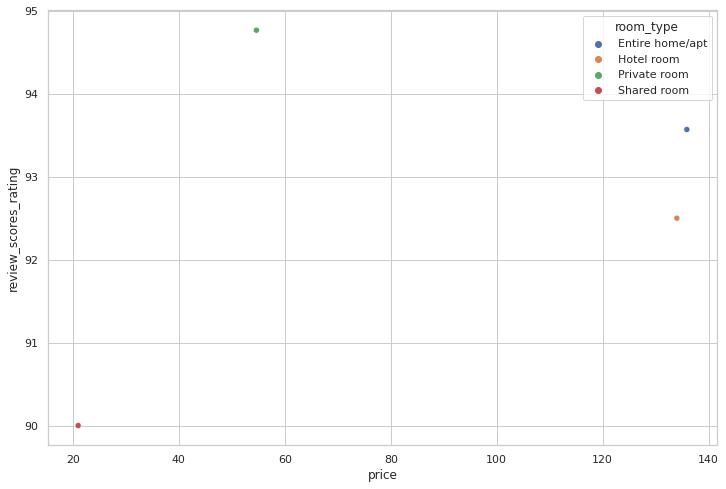

In [10]:
sns.scatterplot(data=df, x='price', y='review_scores_rating', hue='room_type')

In [12]:
query = '''
SELECT
    distinct host_id,
             host_verifications
FROM
    ldn_listings
WHERE
    experiences_offered != 'none'
'''
df = ph.read_clickhouse(query, connection=connection_default)


In [20]:
df.host_verifications[0].strip('[]').split(', ')

["'email'",
 "'phone'",
 "'facebook'",
 "'reviews'",
 "'offline_government_id'",
 "'selfie'",
 "'government_id'"]

In [24]:
df.host_verifications = df.host_verifications.apply(lambda x: x.strip('[]').split(', '))

In [27]:
df.explode('host_verifications').host_verifications.value_counts()

'phone'                    1361
'email'                    1345
'reviews'                  1309
'government_id'            1196
'jumio'                    1115
'offline_government_id'     469
'work_email'                279
'facebook'                  270
'selfie'                    252
'identity_manual'           227
'manual_offline'             70
'google'                     34
'kba'                        27
'manual_online'              16
'sent_id'                     6
Name: host_verifications, dtype: int64